# Análise de agrupamento

In [15]:
from IPython.display import Image

## UCI handwritten digits dataset
1,797 instâncias de dígitos manuscritos;<br>
44 diferentes voluntários;<br>
Mapas 8x8 = pressão e posição dos traços --> **64 features**

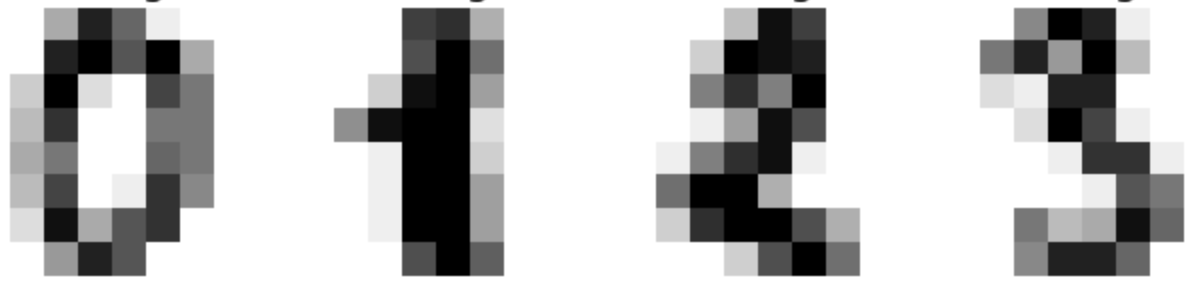

In [26]:
Image(filename='./digitos.png', width=400)

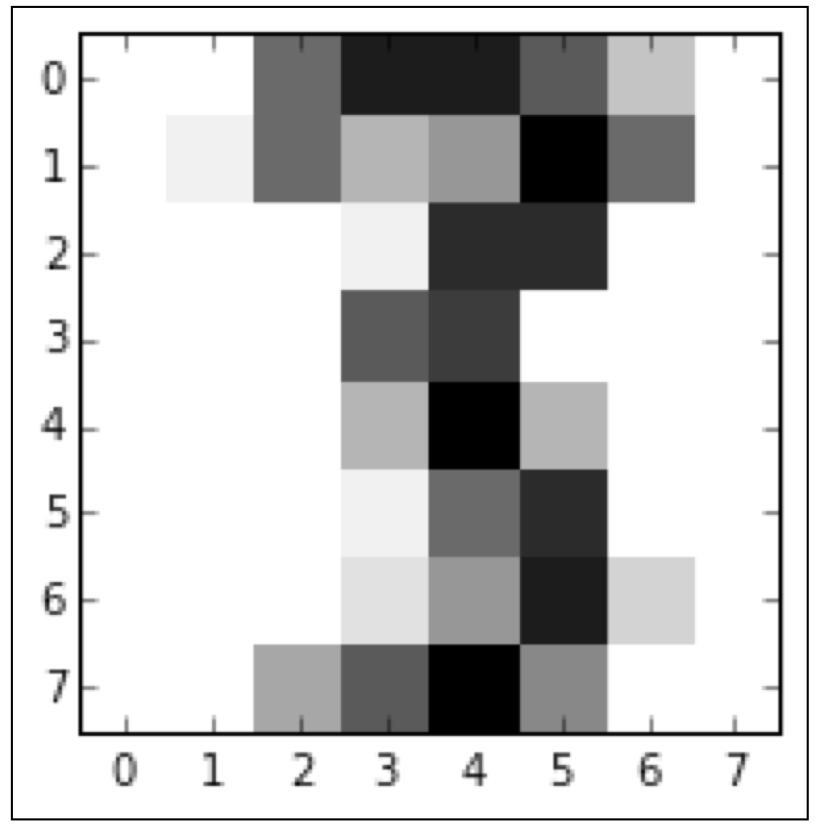

In [25]:
Image(filename='./digito.png', width=400) 

## Aplicando PCA...

Proporção da variância explicada (1os 10 componentes):
 [ 0.12033916  0.09561053  0.08444415  0.06498402  0.04859984  0.04214089
  0.03941913  0.03387293  0.02997757  0.02930253]

Soma da variância explicada (1os 10 componentes):
 0.588690746183


/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


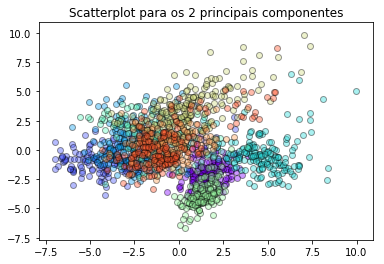

In [27]:
# -*- coding: utf-8 -*-
"""
@author: a-johear
Adaptado por Hendrik
"""

import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.cm as cm

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

#principal component analysis

pca = PCA(n_components=10)
data_r = pca.fit(data).transform(data)

#linear discriminant analysis

#lda = LDA(n_components=2)
#data_r2 = lda.fit(data, labels).transform(data)

print('Proporção da variância explicada (10 componentes):\n %s' % str(pca.explained_variance_ratio_))
print('\nSoma da variância explicada (10 componentes):\n %s' % str(sum(pca.explained_variance_ratio_)))

x = np.arange(2)
ys = [i+x+(i*x)**2 for i in range(10)]

plt.figure()
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
for c, i, target_name in zip(colors, [0,2,3,4,5,6,7,8,9], labels):
    plt.scatter(data_r[labels == i, 0], data_r[labels == i, 1], c=c, alpha = 0.4, edgecolor='black')
    plt.legend()
    plt.title('Scatterplot para os 2 principais componentes')
plt.show()

Plotagem mostra que apesar de haver separação visual entre classes considerando os 2 primeiros componentes, certamente é difícil classificar com alta acurácia este dataset. Entretanto, classes parecem estar agrupadas e análise de agrupamento pode ajudar. <br>
Ou seja, PCA ajudou a esclarecer como o dataset está estruturado.

# k-means clustering

Algoritmo mais popular de agrupamento. <br>
Inicialmente: seleciona k pontos de partida aleatoriamente, que representam os centróides iniciais de cada cluster; <br>
Processo iterativo:<br>
• Cada ponto é associado a um destes centróides considerando-se a distância.<br>
• O centróide de cada cluster passa a ser a média das distância dos pontos pertencentes.<br>
Com o tempo, os centróides se movem para posições que minimizam uma métrica de performance (ex: menor soma dos quadrados intra cluster). Convergência ocorre quando nenhum ponto sofrer modificação de cluster.

In [50]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 50

print("digitos: %d, \t exemplos: %d, \t features: %d"
      % (n_digits, n_samples, n_features))


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('% 9s   %.2fs    %i   %.3f   %.3f   %.3f   %.3f    %.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

digitos: 10, 	 exemplos: 1797, 	 features: 64


## k-means random

In [53]:
print(73 * '_')
print('% 9s' % 'init'
      '         time   inertia   homo   compl   v-meas   ARI     silhouette')
bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

_________________________________________________________________________
init         time   inertia   homo   compl   v-meas   ARI     silhouette
   random   0.18s    69740   0.646   0.711   0.677   0.545    0.158


## k-means++
Minimiza chance de clusters ruins: procedimento de inicialização de centróides que aproxima a variância mínima inter-classes.

In [54]:
print(73 * '_')
print('% 9s' % 'init'
      '         time   inertia   homo   compl   v-meas   ARI     silhouette')
bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

_________________________________________________________________________
init         time   inertia   homo   compl   v-meas   ARI     silhouette
k-means++   0.19s    69673   0.682   0.722   0.702   0.573    0.163


In [ ]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 50

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(73 * '_')
print('% 9s' % 'init'
      '         time   inertia   homo   compl   v-meas   ARI     silhouette')

## Métricas de performance
homogeneity [0, 1] --> medida da pureza de um cluster. Valor 1 => todos os clusters contém medidas de uma única classe.<br>
completeness [0, 1] --> mede o quanto todos os elementos de uma classe estão associados a um mesmo cluster (valor 1). Se ambas medidas tem valor 1 => clustering perfeito!<br>
validity measure (v-measure) --> média harmônica da homogeneity e completeness.<br>
Adjusted Rand Index (ARI) --> medida de similaridade que mede o consenso entre a classe real e a prevista (valor 1 é o melhor).<br>
PROBLEMA com esss métricas: necessitam de conhecimento do cluster real (rótulos verdadeiros).

### Métrica Silhouette (coeficiente)
Alternativa para ausência de dados rotulados.<br>
Quão bem definidos estão os clusters de um modelo? <br>
Silhouette coef para um dataset é a média do coeficiente para cada exemplo:

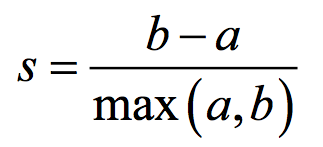

In [14]:
Image(filename='./silhouette.png', width=200)

a: distância média entre um exemplo e todos os outros pontos no mesmo cluster<br>
b: distância média entre um exemplo e todos os outros pontos no próximo cluster mais próximo<br>
Valores [-1, 1]: <br>
-1 => clustering incorreto;<br>
+1 => clustering muito denso;<br>
0 => sobreposição de clusters.

## Análise de contexto
random => 10% <br>
conv nets => estado da arte<br>
qualquer outra coisa => entre esses dois

## Usando PCA para reduzir dimensionalidade
N componentes = número de dígitos (10)<br>
====> V-measure e ARI ?

In [55]:
print(73 * '_')
print('% 9s' % 'init'
      '         time   inertia   homo   compl   v-meas   ARI     silhouette')
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=10),
              name="PCA-based",
              data=data)
print(73 * '_')

_________________________________________________________________________
init         time   inertia   homo   compl   v-meas   ARI     silhouette
PCA-based   0.04s    70793   0.667   0.695   0.681   0.553    0.060
_________________________________________________________________________


/anaconda/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:889: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


N componentes = 2 (possibilitar plotagem)

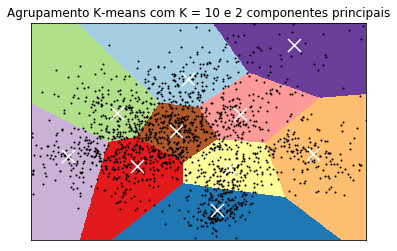

In [56]:
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(reduced_data)

h = .03    

x_min, x_max = reduced_data[:, 0].min() + 1, reduced_data[:, 0].max() - 3
y_min, y_max = reduced_data[:, 1].min() + 1, reduced_data[:, 1].max() - 3
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Agrupamento K-means com K = 10 e 2 componentes principais')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## Qual o melhor valor de k?

Uma técnica útil é o **elbow method**. Funciona mais como heurística.<br>
Para cada instância de k, plota a percentagem da variância explicada. Tipicamente isso gera uma curva que parece um braço curvado. <br>
A idéia então é selecionar o valor de k que maximiza a variância explicada (ou minimiza a distorção) enquanto minimiza k. Isto é, o valor de k no cotovelo. A rationale é que um minimo ganho na variância explicada em valores maiores para k é compensado pelo risco crescente de overfitting. 

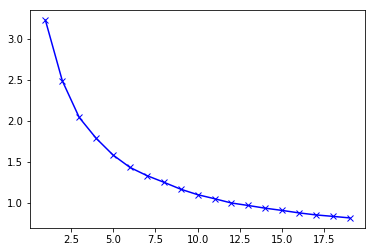

In [58]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
digits = load_digits()
data = scale(digits.data)
n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target
K = range(1,20)
explainedvariance= []
for k in K:
    reduced_data = PCA(n_components=2).fit_transform(data)
    kmeans = KMeans(init = 'k-means++', n_clusters = k, n_init = k)
    kmeans.fit(reduced_data)
    explainedvariance.append(sum(np.min(cdist(reduced_data,kmeans.cluster_centers_, 'euclidean'), axis =1))/data.shape[0])
plt.plot(K, explainedvariance, 'bx-')
plt.show()

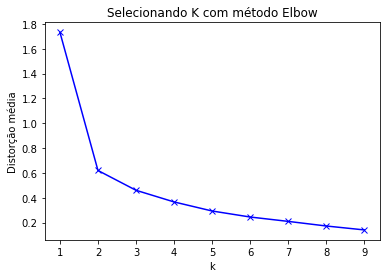

In [59]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

cluster1 = np.random.uniform(0.1, 1.5, (2, 10))
cluster2 = np.random.uniform(4.2, 1.9, (2,10))
X = np.hstack((cluster1, cluster2)).T

K = range(1, 10)
meandistortions = []
for k in K:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis = 1))/ X.shape[0])
        
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distorção média')
plt.title('Selecionando K com método Elbow')
plt.show()

## Validação cruzada

In [60]:
import numpy as np
from sklearn import cross_validation
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
digits = load_digits()
data = scale(digits.data)
n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=n_digits)
cv = cross_validation.ShuffleSplit(n_samples, n_iter = 10, test_size =0.4, random_state = 0)
scores = cross_validation.cross_val_score(kmeans, data, labels, cv =cv, scoring = 'adjusted_rand_score')
print(scores)
print(sum(scores)/cv.n_iter)

[ 0.36551021  0.42435467  0.44155304  0.53307453  0.44704645  0.55111269
  0.3853003   0.52113597  0.55042925  0.36760616]
0.458712326759
